# Playground

Small programs to explore relevant concepts.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

np.random.seed(0)

## Missing Data - Examples

Fully observed structural causal models (SCMs) to generate MCAR, MAR, and MNAR data.

In [2]:
def MCAR(n, d=2):
    # Setting: Pairs of friends are invited to an experiment. Each person share their grade based on a coin toss.

    n_z = np.random.normal(0, 10, n)
    n_x = np.random.normal(70, 10, (n, d))
    n_r = np.random.normal(0, 1, (n, d))

    def f_z(n):
        return n

    def f_x(z, n):
        return z.reshape(-1, 1) + n

    def f_r(n):
        r = np.zeros_like(n)
        r[n > 0] = 1
        return r

    z = f_z(n_z)
    x = f_x(z, n_x)
    r = f_r(n_r)

    x_obs = x[r == 1]
    x_miss = x[r == 0]

    return x_obs, x_miss


def MAR(n, d=2):
    # Setting: Pairs of friends are invited to an experiment. Person 1 shares their grade first in front of person 2, then person 2 is asked to share their grade. Person 2 may decide not to share their grade.
    # Intuition: Since friends have similiar grades, person 2 prefers sharing their grade if person 1 has a good grade (without looking at their own grade first!). 
    #            However, since person 2 is tough on themselves, person 1 must have an above average grade before person 2 dares to share their own grade.

    n_z = np.random.normal(0, 10, n)
    n_x = np.random.normal(70, 20, (n, d))
    n_r = np.random.normal(0, 5, (n, d))

    def f_z(n):
        return n

    def f_x(z, n):
        return z.reshape(-1, 1) + n

    def f_r(x_obs, n, threshold=90):
        r = np.zeros_like(n)
        r[:,0] = 1
        r[x_obs < threshold + n[:,1],1] = 1
        return r

    z = f_z(n_z)
    x = f_x(z, n_x)
    r = f_r(x[:,0], n_r)

    x_obs = x[r == 1]
    x_miss = x[r == 0]

    return x_obs, x_miss


def MNAR(n, d=2):
    # Setting: Pairs of friends are invited to an experiment. Each person is asked to share their grade, the person share their grade if they have a good grade.
    # Note: MNAR can be more complicated than this, since r_n,i can depend on x_n (both x_n,1 and x_n,2 in this example), e.g. either both friends share their grade, or neither of them do 
    #       - depending on whether *both* are happy with their individual grade.

    n_z = np.random.normal(0, 10, n)
    n_x = np.random.normal(70, 10, (n, d))
    n_r = np.random.normal(0, 2, (n, d))
        
    def f_z(n):
        return n

    def f_x(z, n):
        return z.reshape(-1, 1) + n

    def f_r(x, n, threshold=60):
        r = np.zeros_like(x)
        r[x > threshold + n] = 1
        return r

    z = f_z(n_z)
    x = f_x(z, n_x)
    r = f_r(x, n_r)

    x_obs = x[r == 1]
    x_miss = x[r == 0]

    return x_obs, x_miss


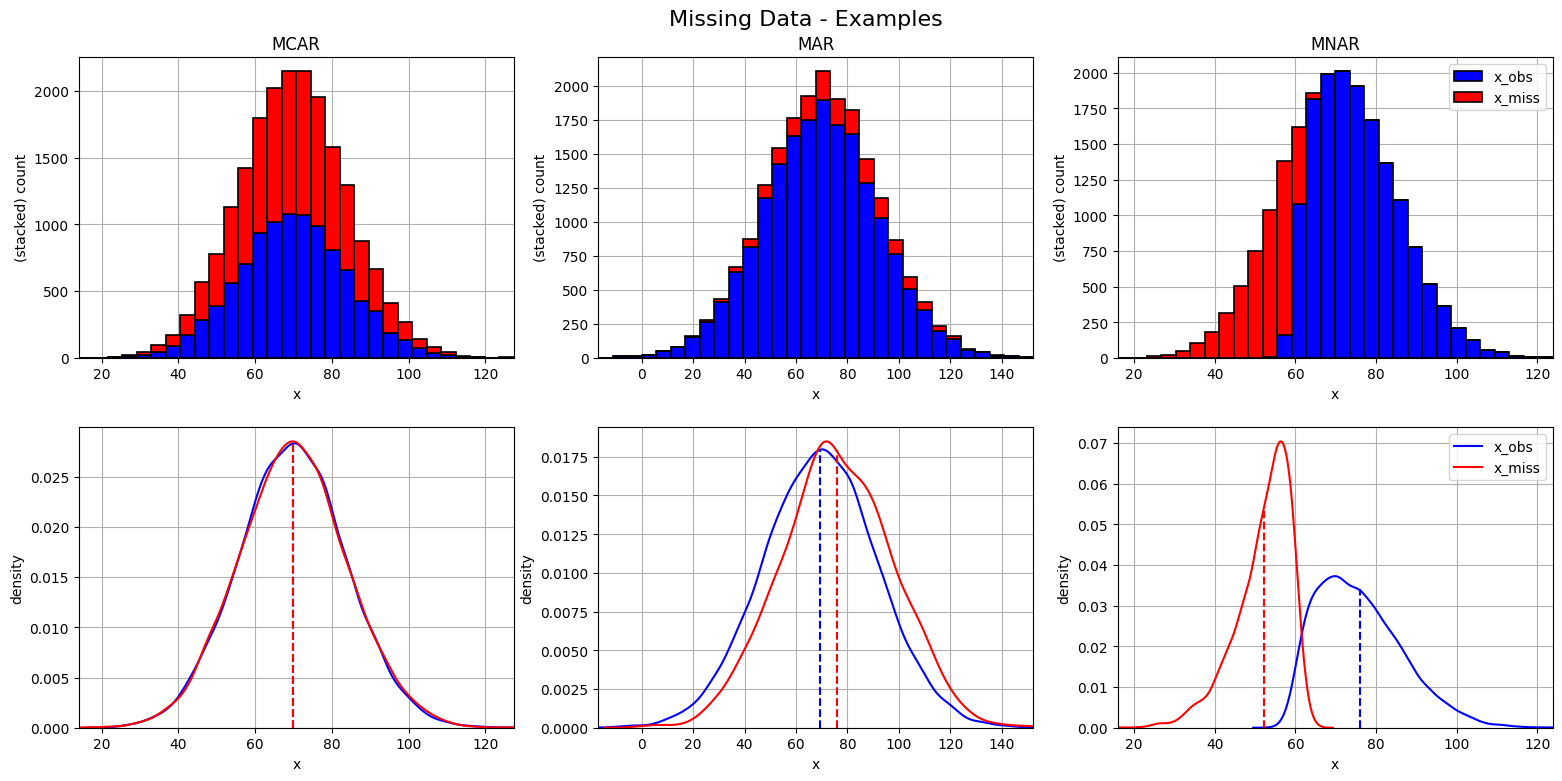

In [3]:
n = 10_000

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.tight_layout(pad=3.0)
fig.suptitle("Missing Data - Examples", fontsize=16)
fig.subplots_adjust(top=0.92)

# MCAR
x_obs, x_miss = MCAR(n)
x = np.hstack((x_obs, x_miss))

ax = axes[0,0]
ax.hist([x_obs, x_miss], color=["blue", "red"], label=["x_obs", "x_miss"], bins=30, edgecolor="black", linewidth=1.2, stacked=True)
ax.set_xlim(np.min(x), np.max(x))
ax.set_title("MCAR")
ax.set_xlabel("x")
ax.set_ylabel("(stacked) count")
ax.grid(True)
ax.set_axisbelow(True)

ax = axes[1,0]
sns.kdeplot(x_obs, color="blue", ax=ax, label="x_obs")
sns.kdeplot(x_miss, color="red", ax=ax, label="x_miss")

kde = ax.lines[0].get_xydata()
xv = np.mean(x_obs)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="blue", linestyle="--")

kde = ax.lines[1].get_xydata()
xv = np.mean(x_miss)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="red", linestyle="--")

ax.set_xlim(np.min(x), np.max(x))
ax.set_xlabel("x")
ax.set_ylabel("density")
ax.grid(True)
ax.set_axisbelow(True)

# MAR
x_obs, x_miss = MAR(n)
x = np.hstack([x_obs, x_miss])

ax = axes[0,1]
ax.hist([x_obs, x_miss], color=["blue", "red"], label=["x_obs", "x_miss"], bins=30, edgecolor="black", linewidth=1.2, stacked=True)
ax.vlines(70, 0, 0.03, color="black", linestyle="--")
ax.set_xlim(np.min(x), np.max(x))
ax.set_title("MAR")
ax.set_xlabel("x")
ax.set_ylabel("(stacked) count")
ax.grid(True)
ax.set_axisbelow(True)

ax = axes[1,1]
sns.kdeplot(x_obs, color="blue", ax=ax, label="x_obs")
sns.kdeplot(x_miss, color="red", ax=ax, label="x_miss")

kde = ax.lines[0].get_xydata()
xv = np.mean(x_obs)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="blue", linestyle="--")

kde = ax.lines[1].get_xydata()
xv = np.mean(x_miss)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="red", linestyle="--")

ax.set_xlim(np.min(x), np.max(x))
ax.set_xlabel("x")
ax.set_ylabel("density")
ax.grid(True)
ax.set_axisbelow(True)

# MNAR
x_obs, x_miss = MNAR(n)
x = np.hstack([x_obs, x_miss])

ax = axes[0,2]
ax.hist([x_obs, x_miss], color=["blue", "red"], label=["x_obs", "x_miss"], bins=30, edgecolor="black", linewidth=1.2, stacked=True)
ax.set_title("MNAR")
ax.set_xlabel("x")
ax.set_ylabel("(stacked) count")
ax.set_xlim(np.min(x), np.max(x))
ax.grid(True)
ax.set_axisbelow(True)
ax.legend()

ax = axes[1,2]
sns.kdeplot(x_obs, color="blue", ax=ax, label="x_obs")
sns.kdeplot(x_miss, color="red", ax=ax, label="x_miss")

kde = ax.lines[0].get_xydata()
xv = np.mean(x_obs)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="blue", linestyle="--")

kde = ax.lines[1].get_xydata()
xv = np.mean(x_miss)
yh = kde[np.argmin(np.abs(kde[:,0] -  xv)),1]
ax.vlines(xv, 0, yh, color="red", linestyle="--")

ax.set_xlim(np.min(x), np.max(x))
ax.set_xlabel("x")
ax.set_ylabel("density")
ax.grid(True)
ax.set_axisbelow(True)
ax.legend();